# HITO 1

##### Los dos enunciados deben estar clasificados, considerando el tipo de problema a resolver (regresión o clasificación). Para cada uno de los enunciados y su problema identificado, se debe justificar el uso de métricas para medir el desempeño del problema.
    Para este segundo desafío se pide generar un modelo que identifique aquellos alumnos que presentan un bajo desempeño académico. De manera adicional sugieren inspeccionar una batería de preguntas asociadas a ciertas variables y ver si éstas se pueden abstraer en categorías latentes.

    Este problema cuenta con tres vectores objetivos designados como G1, G2 y G3. Estos corresponden a las notas durante el primer semestre, segundo semestre y el promedio final. A su vez, se indica que G3 será el vector a predecir en el modelo predictivo. 
    También cuenta con varios atributos de tipo binario, nominal y numérico.

    Dado que los vectores objetivos son de tipo continuos, el modelo a implementar será de regresión lineal.
    Este tipo de regresión corresponde al caso donde la variable objetivo (o dependiente) es continua, y la relación entre esta y los atributos (o variables independientes) es mediante una combinación lineal de estos.

    Respecto a las métricas de desempeño, existe una gran cantidad. Algunos ejemplos son: error cuadrático medio (MSE), raíz del error cuadrático medio (RMSE), error absoluto medio (MAE), R-cuadrado (R²), R-cuadrado ajustado (R²-adj), error porcentual absoluto medio (MAPE), por nombrar algunos.
    En este proyecto se utilizará MSE y R². El MSE representa la expectativa del error cuadrático. Es un indicador de calidad con valores positivos, donde los valores menores indican mejores niveles de ajuste. Sin embargo, este valor por sí solo no es explicativo, es necesario compararlo con el MSE de otro modelo.     
    R² representa la capacidad explicativa del conjunto de atributos en la variabilidad del vector objetivo. Una característica importante a tener en consideración al utilizar esta métrica y hacer la comparación entre modelos, es que el R² no penaliza por la inclusión de variables. Como consecuencia, al agregar más variables al modelo, este valor solo puede aumentar en su poder explicativo o mantenerse constante.

##### Se debe considerar el uso de las librerías asociadas para la ingesta, preprocesamiento, visualización y modelación, así como métricas de evaluación.

In [155]:
# Ingesta
import numpy as np
import pandas as pd
import scipy.stats as stats
import factor_analyzer as factor

# Visualización
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import seaborn as sns
import statsmodels.api as sm
import missingno as msngo

# Modelación
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Métricas de evaluación
from sklearn.metrics import mean_squared_error, r2_score

# Otros
import warnings
warnings.filterwarnings("ignore")

    Las librerías se obtuvieron desde 'conda list'

    # Name                    Version                   Build         Channel
    factor_analyzer           0.3.2              pyh39e3cac_0    desilinguist
    matplotlib                3.5.2            py39haa95532_0
    missingno                 0.4.2                      py_1     conda-forge
    numpy                     1.21.5           py39h7a0a035_3
    pandas                    1.4.4            py39hd77b12b_0
    scikit-learn              1.0.2            py39hf11a4ad_1
    scipy                     1.9.1            py39he11b74f_0
    seaborn                   0.11.2             pyhd3eb1b0_0
    statsmodels               0.13.2           py39h2bbff1b_0

##### Se debe detallar y considerar el proceso de preprocesamiento y recodificación de datos
    La base de datos contiene registros sociodemográficos y conductuales de los alumnos de dos escuelas.
    Desde la organización indican aspectos adicionales a considerar. A continuación se indica el proceso realizado:

    - El primer inconveniente a solucionar es la codificación de la base de datos. La solución es simple, ya que solo hay que indicar como argumento sep='|' al momento de realizar la lectura del archivo .csv mediante pandas.
    
    - Existen datos perdidos registrados como 'nulidade', 'sem validade y 'zero'. Adicional a esto, hay tres variables numéricas que se registraron como tipo de dato string, lo que supone un problema para la interpretación de datos con pandas. Esto se corrige haciendo uso del método .replace().

    - Para las variables binarias se sugiere la recodificación de estas como 0 y 1, asignando 1 a las categorías minoritarias. Esto se realizó mediante Binary Encoding.

    - De manera similar, se indicó realizar el procedimiento a las variables nominales. En este caso también se utilizó Binary Encoding y se eliminó la columna original, dejando así solo valores binarios.

    - Luego de esto se convirtieron todos los valores a flotantes mediante la función .astype() de pandas.

    El proceso realizado se muestra a continuación:

In [156]:
df = pd.read_csv('students.csv', sep='|').drop('Unnamed: 0', axis=1)

In [157]:
df.shape

(395, 33)

In [158]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    object
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    object
 7   Fedu        395 non-null    object
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    object
 13  studytime   395 non-null    object
 14  failures    395 non-null    object
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

## Recodificación de variables

    Recodificación de datos perdidos y variables numéricas para todo el dataframe

In [160]:
# Recodificación de datos perdidos y variables numéricas para todo el dataframe
df.replace(['nulidade', 'sem validade', 'zero', '"'], [np.nan, np.nan, np.nan, ''], regex=True, inplace=True)

In [161]:
df.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,NaN,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,NaN,8,10


    Identificación de variables binarias para posterior recodificación

In [162]:
# identificación de variables binarias
binary_variables = []
for index, value in enumerate(df):
    if len(df[value].value_counts()) <= 2:
        binary_variables.append(value)
print(binary_variables)

['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


    Recodificación de variables binarias

In [163]:
# recodificación de variables binarias
for var in binary_variables:
    df[var] = pd.get_dummies(df[var], drop_first=True)

    Recodificación de variables nominales

In [164]:
# recodificación de variables nominales
nominal_variables = ['Mjob', 'Fjob', 'reason', 'guardian']
for variable in nominal_variables:
    dummies = pd.get_dummies(df[variable], prefix=variable, drop_first=True)
    df = pd.concat([df, dummies], axis=1)
    df.drop(variable, axis=1, inplace=True)

In [165]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_home', 'reason_other', 'reason_reputation', 'guardian_mother',
       'guardian_other'],
      dtype='object')

    Conversión de todos los datos a tipo numérico

In [166]:
for col in df.columns:
    df[col] = df[col].astype('float64')

In [167]:
df.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other
0,0.0,0.0,NaN,1.0,0.0,0.0,4.0,4.0,2.0,2.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,17.0,1.0,0.0,1.0,1.0,1.0,1.0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,15.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


    Identificación de categoría minoritaria para cada variable binaria

In [168]:
binary_and_dummies = []
for index, value in enumerate(df):
    if len(df[value].value_counts()) <= 2:
        binary_and_dummies.append(value)
print(binary_and_dummies)

['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_mother', 'guardian_other']


    Verificación que la categoría minoritaria tenga asignado el valor 1

In [169]:
# identificación de categoría minoritaria para cada variable binaria
for var in binary_and_dummies:
    print(var,':\n', df[var].value_counts(),'\n','-'*30)

school :
 0.0    350
1.0     45
Name: school, dtype: int64 
 ------------------------------
sex :
 0.0    209
1.0    186
Name: sex, dtype: int64 
 ------------------------------
address :
 1.0    305
0.0     90
Name: address, dtype: int64 
 ------------------------------
famsize :
 0.0    282
1.0    113
Name: famsize, dtype: int64 
 ------------------------------
Pstatus :
 1.0    349
0.0     46
Name: Pstatus, dtype: int64 
 ------------------------------
schoolsup :
 0.0    345
1.0     50
Name: schoolsup, dtype: int64 
 ------------------------------
famsup :
 1.0    239
0.0    156
Name: famsup, dtype: int64 
 ------------------------------
paid :
 0.0    215
1.0    180
Name: paid, dtype: int64 
 ------------------------------
activities :
 1.0    199
0.0    196
Name: activities, dtype: int64 
 ------------------------------
nursery :
 1.0    309
0.0     86
Name: nursery, dtype: int64 
 ------------------------------
higher :
 1.0    369
0.0     26
Name: higher, dtype: int64 
 -------

    Al verificar visualmente que la categoría minoritaria tenga asignado el valor 1, se observa que las variables 'address', 'Pstatus', 'famsup', 'activities', 'nursery', 'higher', 'internet', 'Fjob_other' y 'guardian_mother' tienen estos valores cambiados.
    Esto es fácil de corregir con el método .replace()

In [170]:
swap_binary = ['address', 'Pstatus', 'famsup', 'activities', 'nursery', 'higher', 'internet', 'Fjob_other', 'guardian_mother']
for variable in swap_binary:
    df[variable] = df[variable].replace([1, 0], [0, 1])

    Se vuelve a verificar que la categoría minoritaria tenga asignado el valor 1

In [171]:
# verificación que la categoría minoritaria tenga asignado el valor 1
for var in binary_and_dummies:
    print(var,':\n', df[var].value_counts(),'\n','-'*30)

school :
 0.0    350
1.0     45
Name: school, dtype: int64 
 ------------------------------
sex :
 0.0    209
1.0    186
Name: sex, dtype: int64 
 ------------------------------
address :
 0.0    305
1.0     90
Name: address, dtype: int64 
 ------------------------------
famsize :
 0.0    282
1.0    113
Name: famsize, dtype: int64 
 ------------------------------
Pstatus :
 0.0    349
1.0     46
Name: Pstatus, dtype: int64 
 ------------------------------
schoolsup :
 0.0    345
1.0     50
Name: schoolsup, dtype: int64 
 ------------------------------
famsup :
 0.0    239
1.0    156
Name: famsup, dtype: int64 
 ------------------------------
paid :
 0.0    215
1.0    180
Name: paid, dtype: int64 
 ------------------------------
activities :
 0.0    199
1.0    196
Name: activities, dtype: int64 
 ------------------------------
nursery :
 0.0    309
1.0     86
Name: nursery, dtype: int64 
 ------------------------------
higher :
 0.0    369
1.0     26
Name: higher, dtype: int64 
 -------

### Comprobación de correcta recodificación mediante la visualización de los valores únicos

In [172]:
print('Valores únicos:')
for variable in df.columns:
    print(variable,':\n', df[variable].unique(),'\n','-'*60)

Valores únicos:
school :
 [0. 1.] 
 ------------------------------------------------------------
sex :
 [0. 1.] 
 ------------------------------------------------------------
age :
 [nan 17. 15. 16. 19. 18. 22. 20. 21.] 
 ------------------------------------------------------------
address :
 [0. 1.] 
 ------------------------------------------------------------
famsize :
 [0. 1.] 
 ------------------------------------------------------------
Pstatus :
 [1. 0.] 
 ------------------------------------------------------------
Medu :
 [ 4.  1.  3.  2. nan  0.] 
 ------------------------------------------------------------
Fedu :
 [ 4.  1.  2.  3.  0. nan] 
 ------------------------------------------------------------
traveltime :
 [ 2.  1.  3.  4. nan] 
 ------------------------------------------------------------
studytime :
 [ 2.  3.  1.  4. nan] 
 ------------------------------------------------------------
failures :
 [ 0.  3.  2.  1. nan] 
 --------------------------------------------

    Comprobación mediante tipo de dato para cada variable

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   school             395 non-null    float64
 1   sex                395 non-null    float64
 2   age                391 non-null    float64
 3   address            395 non-null    float64
 4   famsize            395 non-null    float64
 5   Pstatus            395 non-null    float64
 6   Medu               392 non-null    float64
 7   Fedu               390 non-null    float64
 8   traveltime         392 non-null    float64
 9   studytime          390 non-null    float64
 10  failures           390 non-null    float64
 11  schoolsup          395 non-null    float64
 12  famsup             395 non-null    float64
 13  paid               395 non-null    float64
 14  activities         395 non-null    float64
 15  nursery            395 non-null    float64
 16  higher             395 non

# HITO 2

## Vectores objetivos

In [174]:
df.loc[:, ['G1', 'G2', 'G3']].describe()

,G1,G2,G3
count,391.000000,395.000000,392.000000
mean,10.933504,10.713924,10.446429
std,3.320593,3.761505,4.568007
min,3.000000,0.000000,0.000000
25%,8.000000,9.000000,8.000000
50%,11.000000,11.000000,11.000000
75%,13.000000,13.000000,14.000000
max,19.000000,19.000000,20.000000


    Respecto a los vectores objetivos, se nota un leve disminución en el promedio general de todos los alumnos a medida que avanza el año escolar. El resultado final es bastante bajo considerando que la nota máxima es 20 y la media obtenida para G3 fue de 10.4

### Boxplots de los vectores objetivos

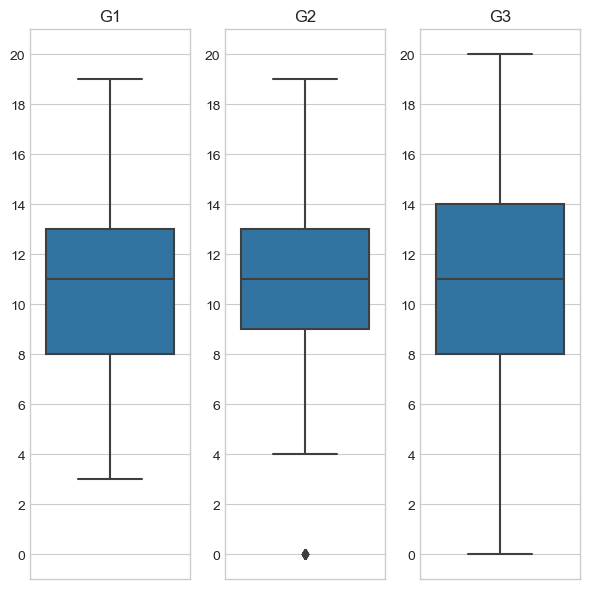

In [175]:
plt.figure(figsize=(6, 6))
for index, value in enumerate(['G1', 'G2', 'G3']):
    plt.subplot(1, 3, index + 1)
    ax = sns.boxplot(y=df[value])
    plt.ylim(-1,21)
    ax.set_yticks(range(0, 21, 2))
    plt.title(value)
    plt.ylabel('')
    plt.tight_layout()

    De manera gráfica se observa que la mediana para los tres vectores objetivos es la misma. Esto es consistente con lo obtenido mediante el método .describe() realizado anteriormente.
    De igual manera, se observa un valor atípico o outlier para G2, el que corresponde a una nota cero.
    Para G2 se observa que el 50% de las notas varían entre 9 y 11.
    El gráfico de caja de G3 muestra una mayor varianza en el promedio final, abarcando la totalidad del rango de notas.


### Histogramas de los vectores objetivos

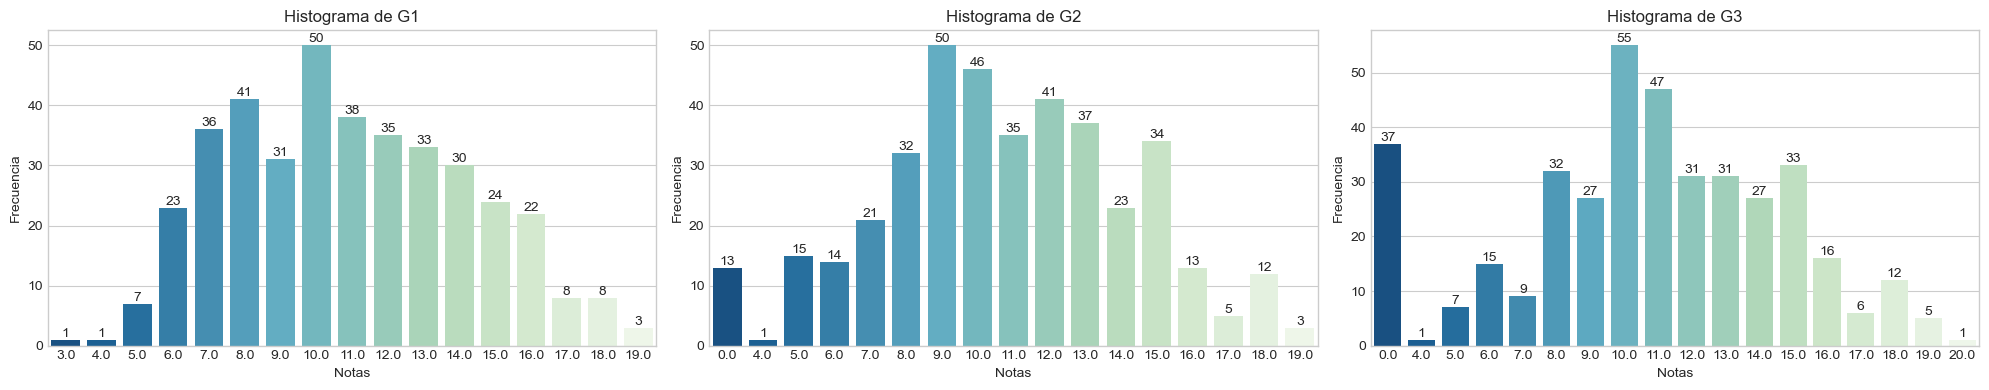

In [176]:
plt.figure(figsize=(20,4))
for index, vector in enumerate(['G1', 'G2', 'G3']):
    plt.subplot(1, 3, index + 1)
    ax = sns.countplot(df[vector], palette='GnBu_r')
    plt.xlabel("Notas")
    plt.ylabel("Frecuencia")
    plt.title(f'Histograma de {vector}')
    for i in ax.containers:
        ax.bar_label(i, label_type='edge')
plt.tight_layout()

    A diferencia del método .describe() y el gráfico de cajas, en este es posible distinguir de manera clara la cantidad de alumnos para cada nota.
    Se puede ver que en G2, el dato mostrado como un outlier en el gráfico de cajas, corresponde a 13 alumnos con nota cero.
    

### Datos perdidos en los vectores objetivos

In [177]:
# Porcentaje de datos perdidos en los vectores objetivos
for vector in ['G1', 'G2', 'G3']:
    print(f'Porcentaje y cantidad de datos perdidos para {vector}:')
    print('Porcentaje:\n',round((df[vector].isna().value_counts('%')*100),3),'\n','-'*20)
    print('Cantidad:\n',df[vector].isna().value_counts(),'\n','-'*50)

Porcentaje y cantidad de datos perdidos para G1:
Porcentaje:
 False    98.987
True      1.013
Name: G1, dtype: float64 
 --------------------
Cantidad:
 False    391
True       4
Name: G1, dtype: int64 
 --------------------------------------------------
Porcentaje y cantidad de datos perdidos para G2:
Porcentaje:
 False    100.0
Name: G2, dtype: float64 
 --------------------
Cantidad:
 False    395
Name: G2, dtype: int64 
 --------------------------------------------------
Porcentaje y cantidad de datos perdidos para G3:
Porcentaje:
 False    99.241
True      0.759
Name: G3, dtype: float64 
 --------------------
Cantidad:
 False    392
True       3
Name: G3, dtype: int64 
 --------------------------------------------------


### Observación de la normalidad de los vectores objetivos

<Figure size 200x200 with 0 Axes>

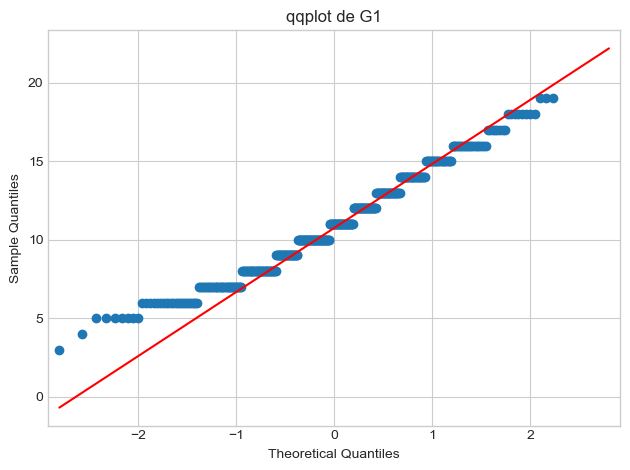

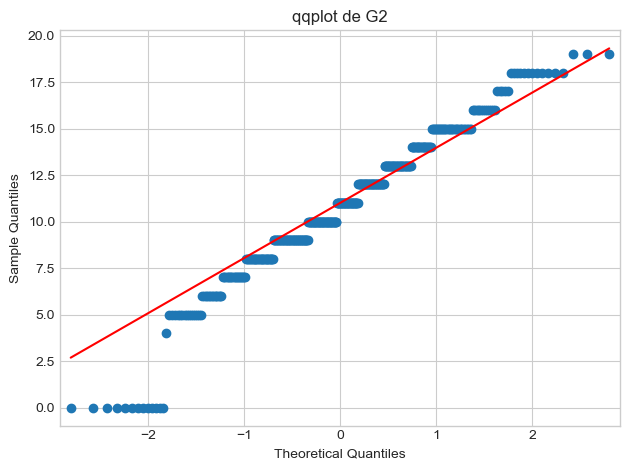

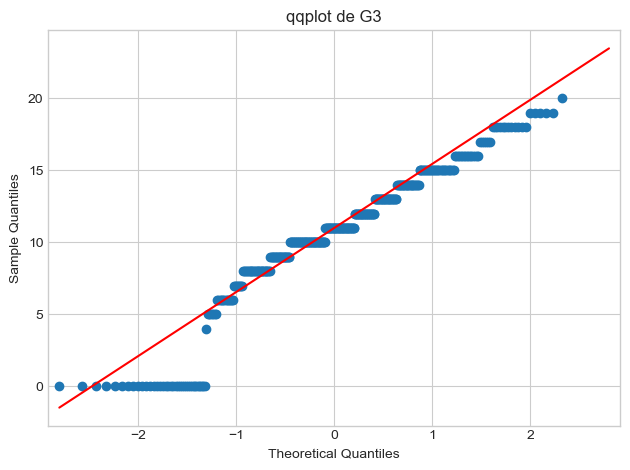

In [178]:
plt.figure(figsize=(2,2))
for index, vector in enumerate(['G1', 'G2', 'G3']):
    sm.qqplot(df[vector], line='q')
    plt.title(f'qqplot de {vector}')
    plt.tight_layout()  

    El comportamiento esperado de un gráfico qq que responde a la normalidad es que lo datos se sitúen en torno a la recta.
    Para los 3 vectores objetivos que observa que una gran cantidad de los datos que se sitúan en los extremos inferiores presentan desviaciones más notorias.

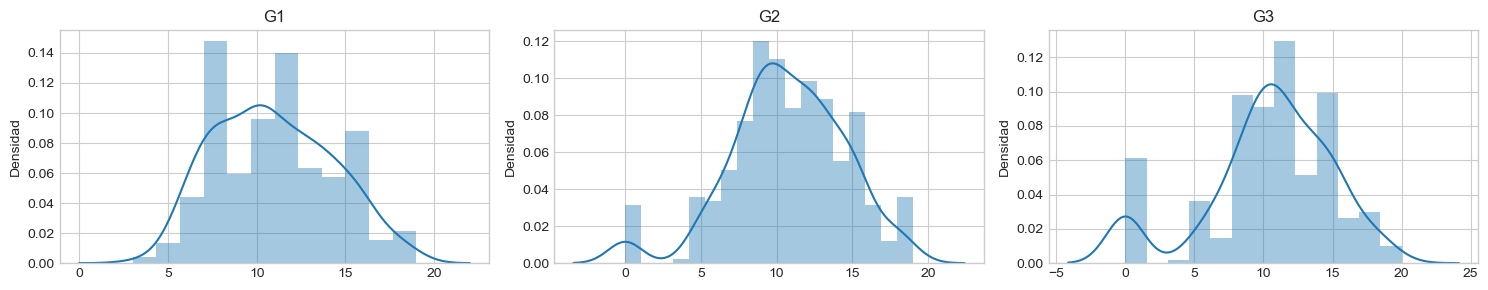

In [179]:
plt.figure(figsize=(15,3))
for index, vector in enumerate(['G1', 'G2', 'G3']):
    plt.subplot(1,3, index+1)
    sns.distplot(df[vector])
    plt.title(f'{vector}')
    plt.xlabel('')
    plt.ylabel('Densidad')
plt.tight_layout()  

    Se observa que los vectores 'G2' y 'G3' tienen una distribución cercana a la normal. También se aprecia la variabilidad mostrada en los gráficos qq antes mostrados.

## Atributos

###  Atributos no binarios

In [180]:
non_binary_atributes = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']
df.loc[:, non_binary_atributes].describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
count,391.000000,392.000000,390.000000,392.000000,390.000000,390.000000,390.000000,393.000000,390.000000,392.000000,390.000000,391.000000,391.000000
mean,16.698210,2.742347,2.525641,1.451531,2.038462,0.335897,3.948718,3.229008,3.102564,1.482143,2.294872,3.570332,5.731458
std,1.279412,1.095185,1.088906,0.699066,0.842970,0.746883,0.896973,0.996664,1.117629,0.893104,1.293736,1.377303,8.025089
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000
50%,17.000000,3.000000,2.500000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000


    Por comentar algunas observaciones, el rango de edad de los estudiantes varía entre los 15 y 22 años.
    Se observa que en 'studytime' (horas semanales dedicadas al estudio) la media es de 2 lo que corresponde a un tiempo de estudio entre 2 y 5 horas.
    En 'absences', el percentil 75 indica que el 75% de los estudiantes ha faltado a la escuela como máximo 8 veces. El 25% restante ha faltado más veces.

### Porcentaje de datos perdidos en los atributos

In [181]:
df_atributos = df.drop(['G1', 'G2', 'G3'], axis=1)
for atributo in df_atributos.columns:
    print(atributo,':\n',round((df[atributo].isna().value_counts('%')*100),3),'\n','-'*30)

school :
 False    100.0
Name: school, dtype: float64 
 ------------------------------
sex :
 False    100.0
Name: sex, dtype: float64 
 ------------------------------
age :
 False    98.987
True      1.013
Name: age, dtype: float64 
 ------------------------------
address :
 False    100.0
Name: address, dtype: float64 
 ------------------------------
famsize :
 False    100.0
Name: famsize, dtype: float64 
 ------------------------------
Pstatus :
 False    100.0
Name: Pstatus, dtype: float64 
 ------------------------------
Medu :
 False    99.241
True      0.759
Name: Medu, dtype: float64 
 ------------------------------
Fedu :
 False    98.734
True      1.266
Name: Fedu, dtype: float64 
 ------------------------------
traveltime :
 False    99.241
True      0.759
Name: traveltime, dtype: float64 
 ------------------------------
studytime :
 False    98.734
True      1.266
Name: studytime, dtype: float64 
 ------------------------------
failures :
 False    98.734
True      1.266
N

    Dado que ningún atributo supera el 5% de datos perdidos, no se considera la eliminación en el dataframe en estudio.

### Visualización gráfica de las variables binarias luego de la recodificación

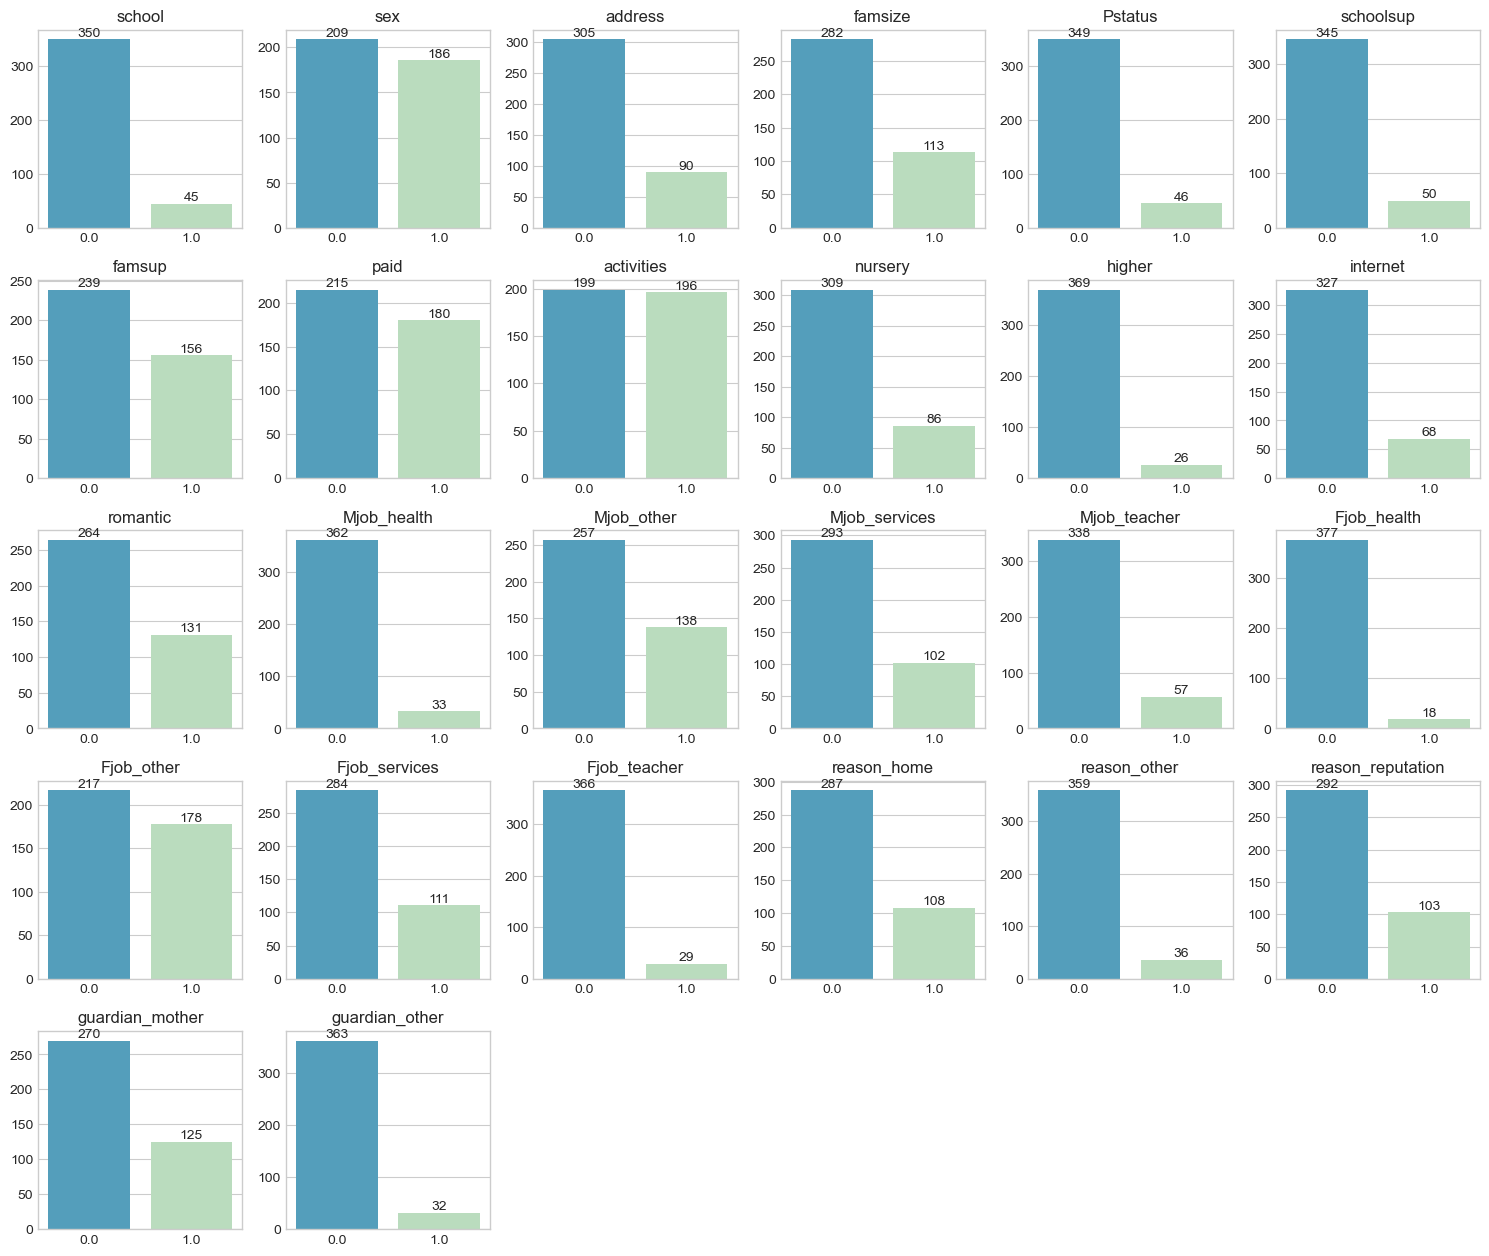

In [182]:
# identificación de variables binarias
binary = []
for index, value in enumerate(df):
    if len(df[value].value_counts()) <= 2:
        binary.append(value)


plt.figure(figsize=(15, 15))
for index, value in enumerate(binary):
    plt.subplot(6, 6, index + 1)
    ax = sns.countplot(df[value], palette='GnBu_r')
    plt.xlabel("")
    plt.ylabel("")
    plt.title(value)
    for i in ax.containers:
        ax.bar_label(i, label_type='edge')
plt.tight_layout()

    En esta representación gráfica es posible notar el desbalance que tienen algunas variables. Algunas de las que más diferencia presentan son 'higher', 'Mjob_healt', 'Fjob_at_home', 'Fjob_teacher', por nombrar algunas. Más adelante será posible notar el grado de importancia de estas variables.

### Análisis de la batería de preguntas

    A continuación se realizará el análisis para comprobar si la batería de preguntas se pueden abstraer en categorías latentes.

    Filtramos las columnas y observamos los datos perdidos

In [183]:
bateria_preguntas = ['famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health']
df_bat_preg = df.loc[:, bateria_preguntas]
df_bat_preg.isna().sum()

famrel      5
freetime    2
goout       5
Dalc        3
Walc        5
health      4
dtype: int64

<Figure size 400x400 with 0 Axes>

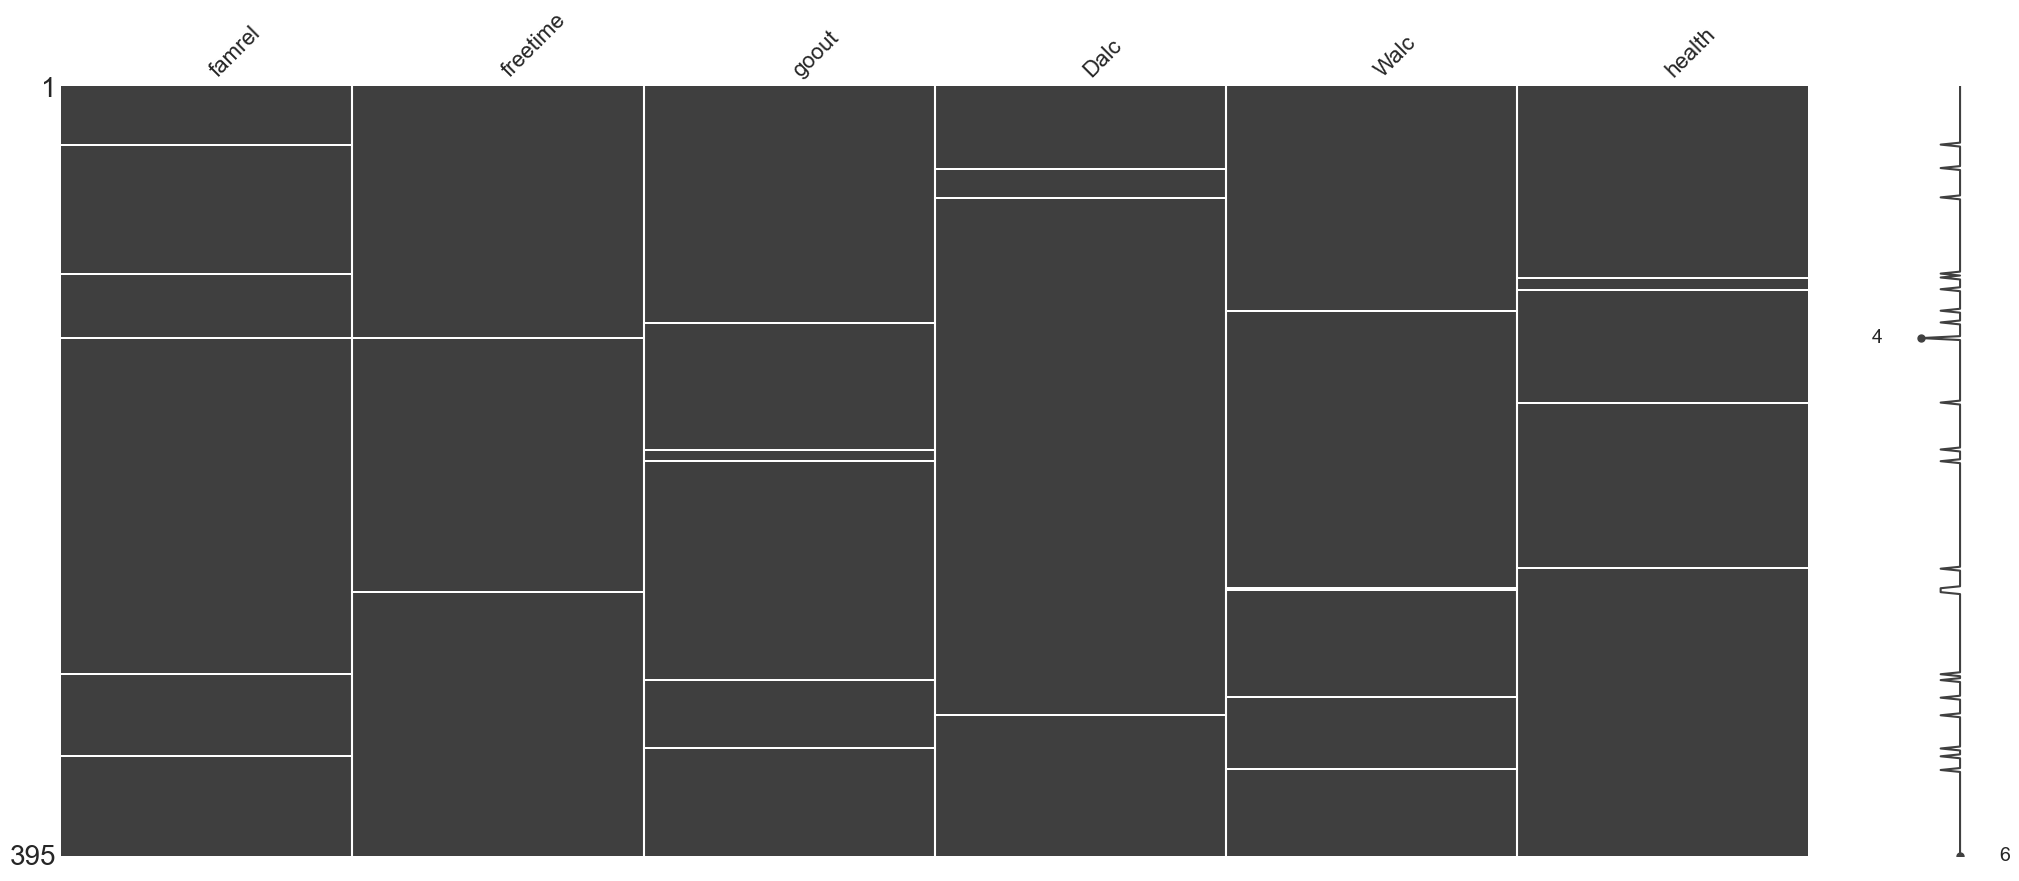

In [184]:
plt.figure(figsize=(4,4))
msngo.matrix(df_bat_preg);

    La función matrix dentro de la librería missingno permite visualizar la matriz de datos, las líneas en blanco representan respuestas perdidas (o negadas) por el encuestado.

    Reporte de las medias para cada una de las preguntas de la batería

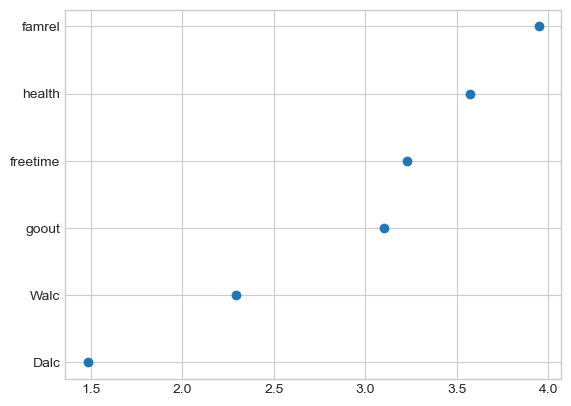

In [185]:
# Generamos dos arrays vacíos para guardar el nombre de la variable y la media
variable = []
mean = []

# para cada columna de la base, extraemos su nombre y sus valores
for colname, serie in df_bat_preg.items():
    # guardamos el nombre en variable
    variable.append(colname)
    # calculamos y procesamos la media
    mean.append(serie.mean())

df_mean = pd.DataFrame({'var':variable, 'mean': mean}).sort_values(by=['mean'])
plt.plot(df_mean['mean'], df_mean['var'],'o');

    Acá se muestra el promedio de respuestas para cada pregunta. La numeración de las respuestas va de 1 a 5, donde 1 representa muy poco o muy negativo y 5 muy alto o muy positivo según la pregunta realizada.

### Idoneidad de la batería de preguntas para extraer factores latentes

    Prueba de esfericidad de errores de Bartlett

In [186]:
#import factor_analyzer as factor

factor.calculate_bartlett_sphericity(df_bat_preg.dropna())

(335.2002252214302, 1.2497297491608938e-62)

    En este caso, la prueba de esfericidad arroja un p_value menor a 0.05, lo que sugiere que la matriz de correlaciones no es igual a la matriz de identidad con un grado suficientemente alto de confianza, por lo que se puede seguir con el análisis.

    Prueba de muestreo Kaiser-Meyer-Olkin (KMO)

In [187]:
factor.calculate_kmo(df_bat_preg.dropna())

(array([0.5244842 , 0.59081742, 0.62455709, 0.5834961 , 0.55589928,
        0.52162773]),
 0.5770395638887426)

    Valores de KMO sobre 0.7 indican que existe por lo menos un factor latente. En este caso el puntaje para cada ítem dentro de la batería de preguntas es menor, lo que indica que no hay factores latentes.

# HITO 3

    Anteriormente se analizó la batería de preguntas para ver si existían factores latentes. El resultado arrojó que no existen, por lo que estas variables no se considerarán en el primer modelo de regresión.
    A partir de esto se iterará para ir ajustando el modelo con la finalidad de aumentar el R-cuadrado, es decir, el poder explicativo del modelo.
    Se crea además una copia del dataframe original para evitar conflictos.

    Como no se considera la bateria de preguntas, estas variables se eliminan del dataframe

In [188]:
df.drop(['famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health'], axis=1, inplace=True)

In [189]:
df_model = df.copy()

    Para los tres vectores objetivos se utilizará el mismo criterio de modelación.
    El primer modelo considerará todas las variables y en el segundo se hará una depuración de aquellas variables que tengan un p_value mayor a 0.05, con esto la cantidad de variables se verá reducida.

## Vector Objetivo G1

### Modelo 1 G1

In [190]:
model_G1_v1 = smf.ols('G1 ~ school + sex + age + address + famsize + Pstatus + Medu + Fedu + traveltime + studytime +\
                    failures + schoolsup + famsup + paid + activities + nursery + higher + internet + romantic + absences +\
                    Mjob_health + Mjob_other + Mjob_services + Mjob_teacher + Fjob_health + Fjob_other + Fjob_services +\
                    Fjob_teacher + reason_home + reason_other + reason_reputation + guardian_mother + guardian_other', df_model).fit()

In [191]:
model_G1_v1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G1   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     4.466
Date:                Tue, 07 Feb 2023   Prob (F-statistic):           5.28e-13
Time:                        11:45:16   Log-Likelihood:                -884.53
No. Observations:                 363   AIC:                             1837.
Df Residuals:                     329   BIC:                             1969.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            11.8961      2.731      4.356      0.000       6.524      17.268
school                0.2847      0.581      0.490      0.625      -0.858       1.428
sex                   0.7890      0.348      2.266      0.024       0.104       1.474
age                  -0.1637      0.153     -1.067      0.287      -0.466       0.138
address              -0.0192      0.417     -0.046      0.963      -0.839       0.800
famsize               0.2579      0.364      0.708      0.479      -0.458       0.974
Pstatus              -0.1175      0.517     -0.227      0.820      -1.134       0.899
Medu                  0.0912      0.231      0.395      0.693      -0.363       0.546
Fedu                  0.0424      0.201      0.211      0.833      -0.352       0.437
traveltime           -0.0835      0.254     -0.329      0.742      -0.583       0.416
studytime             0.6412      0.212      3.022      0.003       0.224       1.059
failures             -1.4689      0.245     -6.004      0.000      -1.950      -0.988
schoolsup            -2.0084      0.495     -4.056      0.000      -2.982      -1.034
famsup                1.0398      0.353      2.949      0.003       0.346       1.734
paid                 -0.2339      0.347     -0.673      0.501      -0.917       0.449
activities            0.1805      0.324      0.557      0.578      -0.456       0.817
nursery              -0.2335      0.388     -0.601      0.548      -0.997       0.530
higher               -1.2205      0.665     -1.834      0.068      -2.530       0.089
internet             -0.2408      0.441     -0.546      0.586      -1.108       0.627
romantic             -0.2675      0.349     -0.767      0.444      -0.954       0.419
absences              0.0113      0.021      0.542      0.588      -0.030       0.052
Mjob_health           0.7247      0.778      0.931      0.352      -0.806       2.255
Mjob_other           -0.8213      0.504     -1.631      0.104      -1.812       0.169
Mjob_services         0.4754      0.562      0.845      0.399      -0.631       1.582
Mjob_teacher         -0.7345      0.720     -1.020      0.309      -2.151       0.682
Fjob_health          -0.4906      1.034     -0.474      0.636      -2.525       1.544
Fjob_other            1.0586      0.733      1.443      0.150      -0.384       2.501
Fjob_services        -0.9611      0.754     -1.275      0.203      -2.444       0.522
Fjob_teacher          1.5229      0.945      1.612      0.108      -0.336       3.382
reason_home           0.1887      0.400      0.472      0.638      -0.599       0.976
reason_other         -0.3226      0.591     -0.546      0.585      -1.485       0.840
reason_reputation     0.5414      0.424      1.276      0.203      -0.293       1.376
guardian_mother      -0.0761      0.394     -0.193      0.847      -0.851

    El intercepto obtenido indica que un alumno con una edad de 0 años por ejemplo, tendría un promedio de notas del primer semestre de 11.9. Hay que considerar que el intercepto solo tiene sentido en el contexto del modelo. Siguiendo con la misma variable, se espera que la diferencia de notas del primer semestre entre dos alumnos de similares características pero que difieren en un año de edad varíe en 0.16 unidades.

### Estadísticos de bondad de ajuste

In [192]:
model_G1_v1.summary().tables[0]

Dep. Variable:,G1,R-squared:,0.309
Model:,OLS,Adj. R-squared:,0.240
Method:,Least Squares,F-statistic:,4.466
Date:,"Tue, 07 Feb 2023",Prob (F-statistic):,5.28e-13
Time:,11:45:16,Log-Likelihood:,-884.53
No. Observations:,363,AIC:,1837.
Df Residuals:,329,BIC:,1969.
Df Model:,33,,
Covariance Type:,nonrobust,,


    Para este primer modelo, el R-squared = 0.309 indica que las variables explican en un 30.9% la variabilidad de las notas durante el primer semestre.
    El valor de Adj. R-squared = 0.24 penaliza por la cantidad de variables agregadas al modelo.
    Prob (F-statistic) = 5.28e-13 señala que existe evidencia para rechazar la hipótesis nula, la cual indica que no existen coeficientes distintos de cero para un intervalo de confianza al 95%.

    Con la obtención de los estadísticos de bondad de ajuste y los p_values para cada variable. Ahora se realizará la depuración del modelo con un intervalo de confianza al 95%.
    Con esto, se excluirán aquellas variables que tengan un p_value mayor a 0.05

In [193]:
def p_value_table(modelo, p_value_menor_a=1):
    """
    Muestra una tabla con los valores de p_value de cada atributo menores o iguales a un valor condicional

    Parameters
    ----------
    modelo: variable
                    modelo de regresión logística ajustado
    p_value_menor_a: float, opcional
                    valor condicional para el p_value a mostrar, por defecto 1 para mostrar todos los valores
    
    Returns:
            Retorna la tabla con los p_values menores o iguales a la condición exigida
    """
    df_p_values = pd.DataFrame((modelo.pvalues).round(4), columns= {'P>|t|'})
    return df_p_values[df_p_values['P>|t|'] <= p_value_menor_a]

    Depuración de modelo para valores de p_value mayores a 0.05.
    Las variables a considerar en el modelo depurado son 'sex', 'studytime', 'failures', 'schoolsup' y 'famsup'.

In [194]:
p_value_table(model_G1_v1, 0.05)

,P>|t|
Intercept,0.0000
sex,0.0241
studytime,0.0027
failures,0.0000
schoolsup,0.0001
famsup,0.0034


### Modelo 2 G1

In [195]:
model_G1_v2 = smf.ols('G1 ~ sex + studytime + failures + schoolsup + famsup', df_model).fit()

In [196]:
model_G1_v2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G1   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     18.85
Date:                Tue, 07 Feb 2023   Prob (F-statistic):           9.94e-17
Time:                        11:45:16   Log-Likelihood:                -955.31
No. Observations:                 381   AIC:                             1923.
Df Residuals:                     375   BIC:                             1946.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.7208      0.534     18.203      0.000       8.671      10.771
sex            0.7721      0.328      2.353      0.019       0.127       1.417
studytime      0.6510      0.195      3.335      0.001       0.267       1.035
failures      -1.5318      0.215     -7.140      0.000      -1.954      -1.110
schoolsup     -1.8776      0.470     -3.998      0.000      -2.801      -0.954
famsup         0.6149      0.321      1.915      0.056      -0.016       1.246
==============================================================================
Omnibus:                       10.217   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                7.378
Skew:                           0.223   Prob(JB):                       0.0250
Kurtosis:                       2.484   Cond. No.                         9.86
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Estadísticos de bondad de ajuste

In [197]:
model_G1_v2.summary().tables[0]

Dep. Variable:,G1,R-squared:,0.201
Model:,OLS,Adj. R-squared:,0.190
Method:,Least Squares,F-statistic:,18.85
Date:,"Tue, 07 Feb 2023",Prob (F-statistic):,9.94e-17
Time:,11:45:17,Log-Likelihood:,-955.31
No. Observations:,381,AIC:,1923.
Df Residuals:,375,BIC:,1946.
Df Model:,5,,
Covariance Type:,nonrobust,,


    Este modelo sigue siendo válido ya que el valor de Prob (F-statistic) indica que por lo menos existe un parámetro distinto de cero. Sin embargo, la capacidad explicativa del modelo se ve reducida a un porcentaje de 20.1%.   

## Vector Objetivo G2

    Como se mencionó anteriormente, se considerarán todas las variables para el primer modelo, en este caso para el vector objetivo G2.

### Modelo 1 G2

In [198]:
model_G2_v1 = smf.ols('G2 ~ school + sex + age + address + famsize + Pstatus + Medu + Fedu + traveltime + studytime +\
                    failures + schoolsup + famsup + paid + activities + nursery + higher + internet + romantic + absences +\
                    Mjob_health + Mjob_other + Mjob_services + Mjob_teacher + Fjob_health + Fjob_other + Fjob_services +\
                    Fjob_teacher + reason_home + reason_other + reason_reputation + guardian_mother + guardian_other', df_model).fit()

In [199]:
model_G2_v1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G2   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     3.780
Date:                Tue, 07 Feb 2023   Prob (F-statistic):           2.52e-10
Time:                        11:45:17   Log-Likelihood:                -952.68
No. Observations:                 367   AIC:                             1973.
Df Residuals:                     333   BIC:                             2106.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            14.0415      3.176      4.421      0.000       7.794      20.289
school                0.6990      0.681      1.027      0.305      -0.640       2.038
sex                   0.9265      0.407      2.279      0.023       0.127       1.726
age                  -0.3117      0.179     -1.744      0.082      -0.663       0.040
address              -0.3146      0.486     -0.647      0.518      -1.270       0.641
famsize               0.4662      0.422      1.105      0.270      -0.364       1.296
Pstatus               0.4406      0.604      0.729      0.466      -0.748       1.629
Medu                  0.2910      0.268      1.086      0.278      -0.236       0.818
Fedu                 -0.1550      0.234     -0.661      0.509      -0.616       0.306
traveltime           -0.4074      0.296     -1.376      0.170      -0.990       0.175
studytime             0.5330      0.248      2.152      0.032       0.046       1.020
failures             -1.5286      0.276     -5.535      0.000      -2.072      -0.985
schoolsup            -1.2634      0.571     -2.214      0.028      -2.386      -0.141
famsup                1.1206      0.409      2.742      0.006       0.317       1.925
paid                  0.3413      0.404      0.844      0.399      -0.454       1.137
activities            0.0560      0.378      0.148      0.882      -0.687       0.799
nursery              -0.1295      0.454     -0.285      0.776      -1.023       0.764
higher               -0.8522      0.778     -1.096      0.274      -2.382       0.678
internet             -0.6123      0.514     -1.191      0.234      -1.624       0.399
romantic             -1.0203      0.404     -2.524      0.012      -1.815      -0.225
absences              0.0115      0.024      0.472      0.637      -0.036       0.059
Mjob_health           0.9958      0.905      1.100      0.272      -0.785       2.777
Mjob_other           -0.2446      0.582     -0.420      0.674      -1.389       0.900
Mjob_services         0.6026      0.649      0.928      0.354      -0.675       1.880
Mjob_teacher         -0.6241      0.841     -0.742      0.459      -2.279       1.031
Fjob_health           0.0210      1.211      0.017      0.986      -2.362       2.404
Fjob_other            0.4512      0.857      0.527      0.599      -1.234       2.136
Fjob_services         0.0198      0.881      0.022      0.982      -1.714       1.754
Fjob_teacher          1.5572      1.106      1.408      0.160      -0.619       3.733
reason_home           0.4264      0.468      0.911      0.363      -0.494       1.347
reason_other          0.5661      0.680      0.832      0.406      -0.773       1.905
reason_reputation     0.6832      0.492      1.389      0.166      -0.285       1.651
guardian_mother       0.0396      0.459      0.086      0.931      -0.863

### Estadísticos de bondad de ajuste

In [200]:
model_G2_v1.summary().tables[0]

Dep. Variable:,G2,R-squared:,0.273
Model:,OLS,Adj. R-squared:,0.200
Method:,Least Squares,F-statistic:,3.780
Date:,"Tue, 07 Feb 2023",Prob (F-statistic):,2.52e-10
Time:,11:45:17,Log-Likelihood:,-952.68
No. Observations:,367,AIC:,1973.
Df Residuals:,333,BIC:,2106.
Df Model:,33,,
Covariance Type:,nonrobust,,


    Este primer modelo para el vector objetivo G2 tiene un poder explicativo de 27.3% para la variabilidad de las notas durante el segundo semestre.
    De manera similar al vector objetivo G1, el valor Adj. R-squared se ve penalizado por la cantidad de variables consideradas.

    Depuración de modelo para valores de p_value mayores a 0.05.
    Las variables a considerar en el modelo depurado son 'sex', 'studytime', 'failures', 'schoolsup', 'famsup' y 'romantic'.

In [201]:
p_value_table(model_G2_v1, 0.05)

,P>|t|
Intercept,0.0000
sex,0.0233
studytime,0.0321
failures,0.0000
schoolsup,0.0275
famsup,0.0064
romantic,0.0121


### Modelo 2 G2

In [202]:
model_G2_v2 = smf.ols('G2 ~ sex + studytime + failures + schoolsup + famsup + romantic', df_model).fit()

In [203]:
model_G2_v2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G2   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     13.60
Date:                Tue, 07 Feb 2023   Prob (F-statistic):           5.41e-14
Time:                        11:45:17   Log-Likelihood:                -1021.0
No. Observations:                 385   AIC:                             2056.
Df Residuals:                     378   BIC:                             2084.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.8316      0.630     15.608      0.000       8.593      11.070
sex            0.8555      0.381      2.247      0.025       0.107       1.604
studytime      0.5818      0.226      2.580      0.010       0.138       1.025
failures      -1.7248      0.245     -7.036      0.000      -2.207      -1.243
schoolsup     -1.1694      0.537     -2.177      0.030      -2.226      -0.113
famsup         0.6323      0.368      1.718      0.087      -0.091       1.356
romantic      -0.7655      0.385     -1.989      0.047      -1.522      -0.009
==============================================================================
Omnibus:                       30.307   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.369
Skew:                          -0.588   Prob(JB):                     1.04e-09
Kurtosis:                       4.093   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Estadísticos de bondad de ajuste

In [204]:
model_G2_v2.summary().tables[0]

Dep. Variable:,G2,R-squared:,0.178
Model:,OLS,Adj. R-squared:,0.165
Method:,Least Squares,F-statistic:,13.60
Date:,"Tue, 07 Feb 2023",Prob (F-statistic):,5.41e-14
Time:,11:45:17,Log-Likelihood:,-1021.0
No. Observations:,385,AIC:,2056.
Df Residuals:,378,BIC:,2084.
Df Model:,6,,
Covariance Type:,nonrobust,,


    Similar a lo visto anteriormente, al reducir las variables el poder explicativo del modelo disminuye. Aún así, sigue siendo válido ya que el valor de Prob (F-statistic) indica que por lo menos existe un parámetro distinto de cero.

## Vector Objetivo G3

### Modelo 1 G3

In [205]:
model_G3_v1 = smf.ols('G3 ~ school + sex + age + address + famsize + Pstatus + Medu + Fedu + traveltime + studytime +\
                    failures + schoolsup + famsup + paid + activities + nursery + higher + internet + romantic + absences +\
                    Mjob_health + Mjob_other + Mjob_services + Mjob_teacher + Fjob_health + Fjob_other + Fjob_services +\
                    Fjob_teacher + reason_home + reason_other + reason_reputation + guardian_mother + guardian_other', df_model).fit()

In [206]:
model_G3_v1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     3.689
Date:                Tue, 07 Feb 2023   Prob (F-statistic):           5.93e-10
Time:                        11:45:18   Log-Likelihood:                -1019.2
No. Observations:                 365   AIC:                             2106.
Df Residuals:                     331   BIC:                             2239.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            15.3947      3.875      3.972      0.000       7.771      23.018
school                1.3334      0.830      1.606      0.109      -0.300       2.967
sex                   1.3354      0.496      2.694      0.007       0.360       2.310
age                  -0.4445      0.219     -2.033      0.043      -0.875      -0.014
address              -0.3228      0.593     -0.544      0.587      -1.490       0.844
famsize               0.5111      0.514      0.994      0.321      -0.501       1.523
Pstatus               0.2947      0.744      0.396      0.692      -1.168       1.757
Medu                  0.4590      0.326      1.407      0.160      -0.183       1.101
Fedu                 -0.2922      0.286     -1.023      0.307      -0.854       0.270
traveltime           -0.3514      0.369     -0.953      0.341      -1.077       0.374
studytime             0.4646      0.302      1.540      0.125      -0.129       1.058
failures             -1.9708      0.343     -5.740      0.000      -2.646      -1.295
schoolsup            -1.2513      0.696     -1.799      0.073      -2.620       0.117
famsup                0.9813      0.499      1.968      0.050       0.000       1.962
paid                  0.3288      0.493      0.667      0.505      -0.640       1.298
activities            0.4378      0.461      0.950      0.343      -0.469       1.344
nursery              -0.0152      0.554     -0.027      0.978      -1.105       1.074
higher               -1.2083      0.951     -1.270      0.205      -3.080       0.663
internet             -0.4009      0.628     -0.638      0.524      -1.636       0.834
romantic             -1.3512      0.493     -2.740      0.006      -2.321      -0.381
absences              0.0559      0.030      1.891      0.060      -0.002       0.114
Mjob_health           1.0246      1.103      0.929      0.354      -1.146       3.195
Mjob_other           -0.1279      0.711     -0.180      0.857      -1.526       1.271
Mjob_services         0.7573      0.792      0.956      0.340      -0.801       2.316
Mjob_teacher         -0.7981      1.026     -0.778      0.437      -2.816       1.220
Fjob_health           0.4250      1.475      0.288      0.773      -2.477       3.327
Fjob_other            0.6134      1.043      0.588      0.557      -1.438       2.665
Fjob_services        -0.2823      1.074     -0.263      0.793      -2.396       1.831
Fjob_teacher          1.5229      1.347      1.131      0.259      -1.127       4.172
reason_home           0.3718      0.570      0.652      0.515      -0.750       1.494
reason_other          1.2002      0.838      1.432      0.153      -0.449       2.849
reason_reputation     0.9703      0.599      1.619      0.106      -0.209       2.149
guardian_mother      -0.3313      0.560     -0.592      0.554      -1.433

### Estadísticos de bondad de ajuste

In [207]:
model_G3_v1.summary().tables[0]

Dep. Variable:,G3,R-squared:,0.269
Model:,OLS,Adj. R-squared:,0.196
Method:,Least Squares,F-statistic:,3.689
Date:,"Tue, 07 Feb 2023",Prob (F-statistic):,5.93e-10
Time:,11:45:18,Log-Likelihood:,-1019.2
No. Observations:,365,AIC:,2106.
Df Residuals:,331,BIC:,2239.
Df Model:,33,,
Covariance Type:,nonrobust,,


    Este primer modelo para el vector objetivo G3 tiene un poder explicativo de 26.9% para la variabilidad del promedio final.
    Siguiendo el mismo resultado de los modelos anterioes, el valor Adj. R-squared se ve penalizado por la cantidad de variables consideradas.

In [208]:
p_value_table(model_G3_v1, 0.05)

,P>|t|
Intercept,0.0001
sex,0.0074
age,0.0428
failures,0.0000
famsup,0.0500
romantic,0.0065


    Depuración de modelo para valores de p_value mayores a 0.05.
    Las variables a considerar en el modelo depurado son 'sex', 'age', 'failures', 'famsup' y 'romantic'.

### Modelo 2 G3

In [209]:
model_G3_v2 = smf.ols('G3 ~ sex + age + failures + famsup + romantic', df_model).fit()

In [210]:
model_G3_v2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     14.90
Date:                Tue, 07 Feb 2023   Prob (F-statistic):           2.39e-13
Time:                        11:45:18   Log-Likelihood:                -1093.2
No. Observations:                 383   AIC:                             2198.
Df Residuals:                     377   BIC:                             2222.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.9550      2.965      4.707      0.000       8.125      19.785
sex            0.9313      0.442      2.108      0.036       0.063       1.800
age           -0.1915      0.180     -1.065      0.287      -0.545       0.162
failures      -2.1806      0.307     -7.112      0.000      -2.783      -1.578
famsup         0.6206      0.452      1.372      0.171      -0.269       1.510
romantic      -0.9065      0.471     -1.925      0.055      -1.832       0.019
==============================================================================
Omnibus:                       29.929   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.856
Skew:                          -0.687   Prob(JB):                     2.70e-08
Kurtosis:                       3.542   Cond. No.                         231.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Estadísticos de bondad de ajuste

In [211]:
model_G3_v2.summary().tables[0]

Dep. Variable:,G3,R-squared:,0.165
Model:,OLS,Adj. R-squared:,0.154
Method:,Least Squares,F-statistic:,14.90
Date:,"Tue, 07 Feb 2023",Prob (F-statistic):,2.39e-13
Time:,11:45:18,Log-Likelihood:,-1093.2
No. Observations:,383,AIC:,2198.
Df Residuals:,377,BIC:,2222.
Df Model:,5,,
Covariance Type:,nonrobust,,


    De los tres vectores objetivos, este es el que menor poder explicativo tiene con un porcentaje de 16.5% para el promedio final.
    Siguiendo el mismo comportamiento de los modelos anterioes, Adj. R-squared disminuye y Prob (F-statistic) sigue indicando la validez del modelo con un p_value global menor a 0.05

### Definición de las estrategias de Modelación predictiva

    Para la modelación predictiva se hará uso de machine learning y solo se va a analizar el vector objetivo G3.
    Esta modelación hace uso de herramientas de sklearn, cuyos módulos son 'linear_model', 'model_selection' y 'metrics'. De estos, se usará 'train_test_split' para la separación de muestas, 'LinearRegression' para la modelación y 'mean_squared_error' y 'r2_score' para el reporte de métricas.

    En machine learning, para juzgar qué tan bien se comportó el modelo en predecir los valores del vector objetivo se utilizan métricas que buscan resumir la magnitud en la diferencia entre la predicción y los datos empíricos. Estas métricas son el promedio del error cuadrático (MSE) y el R-cuadrado.
    El MSE representa la expectativa del error cuadrático. Menores valores indican mejores niveles de ajuste.
    El R-cuadrado representa la capacidad explicativa del conjunto de atributos en la variabilidad del vector objetivo.

    Se desarrollarán 4 modelos, el primero y el segundo integrarán todos los atributos, diferenciándose en que el segundo no tendrá intercepto. Para los modelos tercero y cuarto se calcularán las correlaciones entre los atributos y el vector objetivo, y al igual que los dos primeros modelos uno tendrá intercepto y el otro no.

    Finalmente, se harán las comparaciones entre sus métricas para determinar qué modelo predice de mejor manera el promedio final para los alumnos de la base de datos.

# HITO 4

    Librerías a utilizar

In [212]:
#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression
#from sklearn.metrics import mean_squared_error, r2_score

In [213]:
df_sklearn = df_model.drop(['G1', 'G2'], axis=1)
df_sklearn.dropna(inplace=True)

In [214]:
df_sklearn.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'absences',
       'G3', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_home', 'reason_other', 'reason_reputation', 'guardian_mother',
       'guardian_other'],
      dtype='object')

    Se hizo una eliminación de los datos perdidos debido que sklearn genera errores al momento de realizar las predicciones al modelo.

## Modelo 1
    Este modelo considera todos los atributos

### División de la muestra

In [215]:
X_train, X_test, y_train, y_test = train_test_split(df_sklearn.drop(['G3'], axis=1), df_sklearn['G3'], test_size=.33, random_state=7)

### Generación de predicciones

In [216]:
modelo_sklearn = LinearRegression().fit(X_train, y_train)

# predicciones matriz de prueba
y_pred_test = modelo_sklearn.predict(X_test)

### Intercepto del modelo

In [217]:
modelo_sklearn.intercept_

15.244062147144026

### Coeficientes del modelo

In [218]:
modelo_sklearn.coef_.round(5)

array([ 1.75012,  1.79843, -0.46645, -0.04239,  0.6041 ,  0.32007,
        0.19931, -0.17262, -0.6262 ,  0.70474, -1.83964, -1.49548,
        0.8273 ,  0.00307,  1.08215,  0.38644, -1.53736,  0.04645,
       -1.52854,  0.06901,  0.90013,  0.38016,  0.53201,  0.11795,
        1.56099,  0.05263,  0.59616,  1.78469, -0.26363,  1.46872,
        1.01469, -0.6186 ,  1.06462])

### Evaluación del desempeño

In [219]:
# matriz de pruebas
mse_modelo_test = mean_squared_error(y_true=y_test, y_pred=y_pred_test)
r2_modelo_test = r2_score(y_true=y_test, y_pred=y_pred_test)
print(f'MSE: {mse_modelo_test.round(5)}   R2: {r2_modelo_test.round(5)}')

MSE: 18.52322   R2: 0.13987


## Modelo 2

    Para este modelo se modificará solamente el hiperparámetro fit_intercept=False, que por defecto su valor booleano es True.

    De igual manera que lo realizado en el desafío 1 de la prueba, se crea una función que realiza la modelación y calcula las métricas, con la finalidad de no hacer un proceso repetitivo para cada modelo.

In [220]:
def modelacion_sklearn(dataframe, tamaño_prueba, semilla_random, fit_intercept_modelo=True):
    """
    Esta función realiza la modelación predictiva y reporta las métricas obtenidas para los datos de entrenamiento y prueba

    Parameters
    ----------
    dataframe: dataframe de pandas
                    dataframe del cual se obtienen los datos para la modelación y cálculo de métricas
    tamaño_prueba: float
                    porcentaje del tamaño de los datos de pruebas expresado en decimales
    semilla_random: int
                    valor pseudo aleatorio para replicar los resultados
    fit_intercept_modelo: bool, default=True
                    hiperparámetro. Agrega o no el intercepto

    Returns
            None
    """
    # División de la muestra
    X_train, X_test, y_train, y_test = train_test_split(dataframe.drop(['G3'], axis=1), dataframe['G3'], test_size=.33, random_state=7)

    # Generación de predicciones y modificación de hiperparámetros
    modelo_sklearn = LinearRegression(fit_intercept=fit_intercept_modelo).fit(X_train, y_train)

    # predicciones matriz de prueba
    y_pred_test = modelo_sklearn.predict(X_test)

    # intercepto del modelo
    intercepto = modelo_sklearn.intercept_
    print(f'Intercepto del modelo: {intercepto}','\n','-'*80)

    # coeficientes del modelo
    coefs = modelo_sklearn.coef_
    print(f'Coeficientes del modelo:\n {coefs.round(5)}','\n','-'*80)

    # Evaluación del desempeño
    # matriz de pruebas
    mse_modelo_test = mean_squared_error(y_true=y_test, y_pred=y_pred_test)
    r2_modelo_test = r2_score(y_true=y_test, y_pred=y_pred_test)
    print('Evaluación del desempeño:')
    print(f'MSE: {mse_modelo_test.round(5)}   \nR2: {r2_modelo_test.round(5)}')

In [221]:
modelo_sklearn_2 = modelacion_sklearn(df_sklearn, .33, 7, fit_intercept_modelo=False)
modelo_sklearn_2

Intercepto del modelo: 0.0 
 --------------------------------------------------------------------------------
Coeficientes del modelo:
 [ 0.69903  2.07812  0.33225 -0.2659   0.51851  0.52349  0.35092 -0.04253
 -0.29196  0.86057 -1.90785 -0.81107  0.88375  0.02826  1.22551  0.79218
 -1.60441  0.18366 -1.55402  0.04756  1.23362  0.664    0.66012  0.42995
  1.13715  0.31023  0.46418  1.41438 -0.0547   1.69332  1.08822 -0.48997
 -0.36562] 
 --------------------------------------------------------------------------------
Evaluación del desempeño:
MSE: 19.46233   
R2: 0.09626


## Modelo 3

    Para los modelos 3 y 4 se utilizarán los atributos que muestren un valor absoluto de correlación mayor a 0.1.
    El modelo 3 se implementará con intercepto y el modelo 4 sin intercepto.

In [222]:
def fetch_features(dataframe, vector_objetivo):  
    """
    Muestra una tabla ordenada de mayor a menor con los valores absolutos de la correlación de pearson para cada atributo
    
    Parameters
    ----------
    dataframe: dataframe de pandas
                dataframe del cual obtiene la información a analizar
    vector_objetivo: str
                    nombre de la variable objetivo. Con esta se calculará la correlación de cada atributo
    
    Returns:
        Tabla ordenada de mayor a menor con los valores de la correlación
    """
    # extraemos los nombres de las columnas en la base de datos
    columns = dataframe.columns
    attr_name, corr, corr_abs = [], [], []

    for col in columns:
        if col != vector_objetivo:
            # agregamos el nombre de la variable en attr_name
            attr_name.append(col)
            # agregamos la correlación de pearson
            corr.append(dataframe[col].corr(dataframe[vector_objetivo]))
            # agregamos el valor absoluto de la correlación de pearson
            corr_abs.append(abs(dataframe[col].corr(dataframe[vector_objetivo])))
    # transformamos los arrays en un DataFrame
    features = pd.DataFrame({
    'atributo': attr_name,
    'correlacion': corr,
    'abs_corr': corr_abs
    })

    # generamos el index con los nombres de las variables
    features = features.set_index('atributo')
    # ordenamos los valores de forma descendiente
    list_corr = (features.sort_values(by=['abs_corr'], ascending=False))

    return list_corr

    Con la función fetch_features() se identifican aquellos atributos que tengan valor absoluto de correlación mayor a 0.1

In [223]:
fetch_features(dataframe=df_sklearn, vector_objetivo='G3')

,correlacion,abs_corr
atributo,,
failures,-0.373740,0.373740
Medu,0.212608,0.212608
higher,-0.165454,0.165454
age,-0.158160,0.158160
romantic,-0.154377,0.154377
Fedu,0.138835,0.138835
traveltime,-0.113072,0.113072
Fjob_teacher,0.103787,0.103787
Mjob_health,0.102731,0.102731


    Se seleccionan los atributos cuya correlación es mayor a 0.1

In [224]:
attr_10 = fetch_features(dataframe=df_sklearn, vector_objetivo='G3').iloc[:10, 1]
attr_10

atributo
failures        0.373740
Medu            0.212608
higher          0.165454
age             0.158160
romantic        0.154377
Fedu            0.138835
traveltime      0.113072
Fjob_teacher    0.103787
Mjob_health     0.102731
sex             0.101458
Name: abs_corr, dtype: float64

    Se crea un dataframe que contenga estos atributos seleccionados para pasarlo como argumento en la función 'modelacion_sklearn'.

In [225]:
df_corr = df_sklearn.loc[:, ['G3', 'failures', 'Medu', 'higher', 'age', 'romantic', 'Fedu', 'traveltime', 'Fjob_teacher', 'Mjob_health' , 'sex']]

In [226]:
modelo_sklearn_3 = modelacion_sklearn(df_corr, .33, 7, fit_intercept_modelo=True)
modelo_sklearn_3

Intercepto del modelo: 9.60815876648157 
 --------------------------------------------------------------------------------
Coeficientes del modelo:
 [-1.95775  0.37038 -1.27455  0.10043 -1.21503 -0.38862 -0.50452  1.03197
  0.73808  1.4823 ] 
 --------------------------------------------------------------------------------
Evaluación del desempeño:
MSE: 17.59548   
R2: 0.18295


    En este modelo el primer coeficiente indica que al aumentar en una unidad el número de clases reprobadas, el promedio final disminuirá en 1.95 unidades. Dicho de otro modo, se espera que la diferencia del promedio final sea 1.95 unidades al comparar dos alumnos de similares características pero que solo varían en una unidad de la cantidad de clases reprobadas. 
    Los demás atributos afectan el promedio final de igual manera, según su coeficiente correspondiente.

## Modelo 4

    Se mantiene el mismo dataframe del modelo 3 pero se modifica el hiperparámetro 'fit_intercept' a 'False'

In [227]:
modelo_sklearn_4 = modelacion_sklearn(df_corr, .33, 7, fit_intercept_modelo=False)
modelo_sklearn_4

Intercepto del modelo: 0.0 
 --------------------------------------------------------------------------------
Coeficientes del modelo:
 [-2.07225  0.49872 -1.38025  0.63311 -1.36447 -0.30951 -0.40724  1.09555
  0.83216  1.65361] 
 --------------------------------------------------------------------------------
Evaluación del desempeño:
MSE: 18.78293   
R2: 0.12781


    Con la modificación del hiperparámetro, se observa que 8 de los 10 atributos aumentan su efecto en el promedio final.

### Conclusiones
    Con los 4 modelos ya generados, se procede a seleccionar aquel que muestra un mejor demsempeño en predecir las notas del promedio final para los estudiantes.
    En base a los resultados obtenidos, el modelo 3 es el mejor entre las opciones según las métricas obtenidas. Tiene el menor MSE, lo que indica un mejor ajuste en términos de minimizar la diferencia entre los valores observados y los valores predichos. Además, cuenta con el mayor R-cuadrado, lo que significa que explica una mayor cantidad de la variabilidad en los datos. Un R-cuadrado cercano a 1 es un indicador de un buen ajuste, mientras que uno cercano a 0 indica un ajuste deficiente. Si bien el R-cuadrado del modelo 3 está más cercano a 0, entre los modelos realizados este es el que mejor porcentaje tiene.

# Fin Hito 4